# Focal length of the camera from A4

[Stijn Oomes](https://stijnoomes.com/contact-me/) \
Amsterdam, The Netherlands

Created on 12 August 2022\
Updated on 19 March 2024

## Introduction

The focal length $f$ expresssed as quadrance $F$

$$F=\frac{H}{A_{12}} P_{12 }$$

with $H$ the camera height quadrance, $A_{12}$ the quadrance between 2 corner points of the A4, and $P_{12}$ the quadrance between 2 points in the image.

## Import libraries

In [5]:
from math import pi
from math import sqrt

from statistics import mean
from statistics import stdev

import numpy as np
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Data 

In [7]:
# A4 dimensions

a = 0.210224104 # m 
b = 0.297301779

In [8]:
# camera height

h = 0.78 # m

In [9]:
# image

image_width = 4032 #pixels
image_height = 3024

In [10]:
# IMG_2870, A4 with 5 spheres

p0 = [ 552,  600]
px = [ 567, 1803] 
py = [1409,  593] 

## Show image

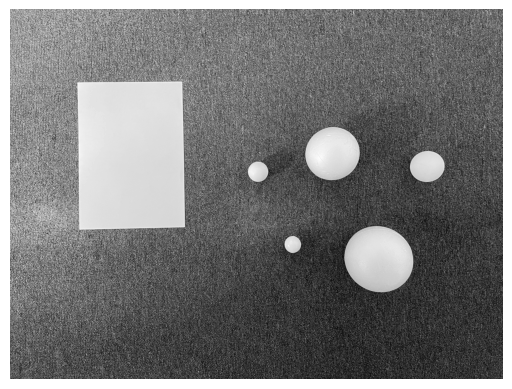

In [12]:
img = cv.imread("IMG_2870.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")
plt.axis("off")
plt.show()

## Define functions

In [14]:
def imageToOpticalCoordinates(image_width, image_height, image_x, image_y):
    
    optical_x0 = (image_width +1)/2.0
    optical_y0 = (image_height +1)/2.0
   
    optical_x = image_x - optical_x0
    optical_y = optical_y0 - image_y
    
    optical_coordinates = [optical_x, optical_y]
    
    return optical_coordinates

In [15]:
def quadrance(p1,p2):
    
    q = (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2
    
    return q

## Calculate corner points in optical coordinates

In [17]:
p0_optic = imageToOpticalCoordinates(image_width, image_height, p0[0], p0[1])
print(p0_optic[0],p0_optic[1])

-1464.5 912.5


In [18]:
px_optic = imageToOpticalCoordinates(image_width, image_height, px[0], px[1])
print(px_optic[0],px_optic[1])

-1449.5 -290.5


In [19]:
py_optic = imageToOpticalCoordinates(image_width, image_height, py[0], py[1])
print(py_optic[0],py_optic[1])

-607.5 919.5


## Calculate world quadrances

In [21]:
A = a*a
B = b*b
C = 3*A

In [22]:
H = h*h

## Calculate image quadrances

In [24]:
P0x = quadrance(p0_optic,px_optic)
P0y = quadrance(p0_optic,py_optic)
Pxy = quadrance(px_optic,py_optic)

In [25]:
P0x

1447434.0

In [26]:
P0y

734498.0

In [27]:
Pxy

2173064.0

## Calculate focal length multiple times

In [29]:
F1 = P0x * H / B
f1 = sqrt(F1)
print(format(f1, '.3f'))

3156.432


In [30]:
F2 = P0y * H / A
f2 = sqrt(F2)
print(format(f2, '.3f'))

3179.856


In [31]:
F3 = Pxy * H / C
f3 = sqrt(F3)
print(format(f3, '.3f'))

3157.823


## Overview of results

In [33]:
f = mean([f1, f2, f3])
df = stdev([f1, f2, f3])
print(format(f, '.0f') + ' ± ' + format(df, '.0f'))

3165 ± 13
